# 1. Reinforcement Learning

### 1. Reward function

To simplify the project, we will assume that the reward function is independent of the current state (s) and the action that you take at the current state (a). To be specific, reward function only depends on the state that you transition to (s′). With this simplification, we have $$R_{ss'}^a=R(s')$$ In this project, we will learn the optimal policy of an agent for two different reward functions:  
&nbsp;• Reward function 1  
&nbsp;• Reward function 2  
The two different reward functions are displayed in figures 6 and 7 respectively.

![reward function](./reward_function.png)

### Question 1

For visualization purpose, generate heat maps of Reward function 1 and Reward function 2. For the heat maps, make sure you display the coloring scale. You will have 2 plots for this question

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reward_function1 = np.zeros((10, 10))
reward_function1[-1][-1] = 1.0
print(reward_function1)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
reward_function2 = np.zeros((10, 10))
reward_function2[-1][-1] = 10.0
reward_function2[1][4:7] = -100.0
reward_function2[2][4] = reward_function2[2][6] = -100.0
reward_function2[3][4] = reward_function2[3][6:9] = -100.0
reward_function2[4][4] = reward_function2[4][8] = -100.0
reward_function2[5][4] = reward_function2[5][8] = -100.0
reward_function2[6][4] = reward_function2[6][8] = -100.0
reward_function2[7][6:9] = -100.0
reward_function2[8][6] = -100.0
print(reward_function2)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100. -100. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.   10.]]


Text(0.5, 1.0, 'heat map for reward function 1')

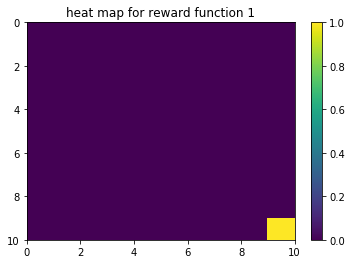

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(reward_function1)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for reward function 1")

Text(0.5, 1.0, 'heat map for reward function 2')

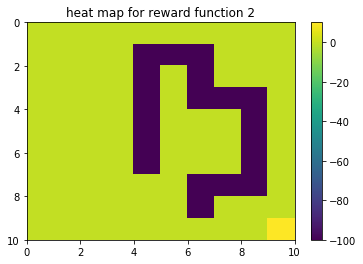

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(reward_function2)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for reward function 2")

### 2. Optimal policy learning using RL algorithms

In this part of the project, we will use reinforcement learning (RL) algorithm to find the optimal policy. The main steps in RL algorithm are:  
&nbsp;• Find optimal state-value or action-value  
&nbsp;• Use the optimal state-value or action-value to determine the deterministic optimal policy  
There are a couple of RL algorithms, but we will use the Value iteration algo- rithm since it was discussed in detail in the lecture. We will skip the derivation of the algorithm here because it was covered in the lecture (for the derivation details please refer to the lecture slides on Reinforcement learning). We will just reproduce the algorithm below for the ease of implementation:

![value_iteration_algorithm](./value_iteration_algo.png)

### Question 2

Create the environment of the agent using the information provided in section 2. To be specific, create the MDP by setting up the state-space, action set, transition probabilities, discount factor, and reward function. For creating the environment, use the following set of parameters:

• Number of states = 100 (state space is a 10 by 10 square grid as displayed in figure 1)  
• Number of actions = 4 (set of possible actions is displayed in figure 2)  
• w = 0.1  
• Discount factor = 0.8  
• Reward function 1  

After you have created the environment, then write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use ε = 0.01. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

In [6]:
num_states = 100
num_actions = 4
w = 0.1
gamma = 0.8
reward_function = reward_function1

In [7]:
def compute_max(row, col, num_actions, w, gamma, V, R):
    maximum = -1000000
    drow = [0, 0, -1, 1]
    dcol = [1, -1, 0, 0]
    for a in range(num_actions):       # iterate over each action, right, left, up, down
        summ = 0
        P = np.zeros((10, 10))
        for i in range(4):   # iterate over each s'
            rowp = row + drow[i]
            colp = col + dcol[i]
            
            if rowp < 0 or rowp > 9: # row out of bound, stay at current position
                rowp = row
            if colp < 0 or colp > 9: # column out of bound, stay at current position
                colp = col
            
            P[rowp][colp] = w / 4.0
            if i == a:
                P[rowp][colp] += 1 - w
              
            summ += P[rowp][colp] * (R[rowp][colp] + gamma * V[rowp][colp])
        
        if summ > maximum:
            maximum = summ
    
    return maximum

In [8]:
def optimal_state_value(num_states, num_actions, w, gamma, R, epsilon=0.01):
    V = np.zeros((10, 10))
    
    delta = 1
    while delta > epsilon:
        delta = 0
        for i in range(num_states):
            row = i // 10
            col = i % 10
            v = V[row][col]
            V[row][col] = compute_max(row, col, num_actions, w, gamma, V, R)
            delta = max(delta, abs(v - V[row][col]))
      
    return V

In [9]:
optimalV = optimal_state_value(num_states, num_actions, w, gamma, reward_function)
print(optimalV)

[[0.04179568 0.06283791 0.089742   0.12384898 0.16708096 0.22188288
  0.29135376 0.37942014 0.49098293 0.60964773]
 [0.06283791 0.08787011 0.12155728 0.16451357 0.21924607 0.28898976
  0.37787112 0.49106061 0.63321853 0.78735399]
 [0.089742   0.12155728 0.16438987 0.21913198 0.28890328 0.37782648
  0.49115592 0.63549019 0.81735527 1.01859718]
 [0.12384898 0.16451357 0.21913198 0.28889981 0.37782476 0.49115916
  0.6356006  0.81960951 1.05219113 1.31505855]
 [0.16708096 0.21924607 0.28890328 0.37782476 0.49115918 0.63560325
  0.81969511 1.05426506 1.35157155 1.69507283]
 [0.22188288 0.28898976 0.37782648 0.49115916 0.63560325 0.8196963
  1.05432164 1.35332408 1.73318006 2.18223115]
 [0.29135376 0.37787112 0.49115592 0.6356006  0.81969511 1.05432164
  1.35335083 1.73446085 2.21952677 2.80680236]
 [0.37942014 0.49106061 0.63549019 0.81960951 1.05426506 1.35332408
  1.73446085 2.22020148 2.839257   3.60762627]
 [0.49098293 0.63321853 0.81735527 1.05219113 1.35157155 1.73318006
  2.21952677 

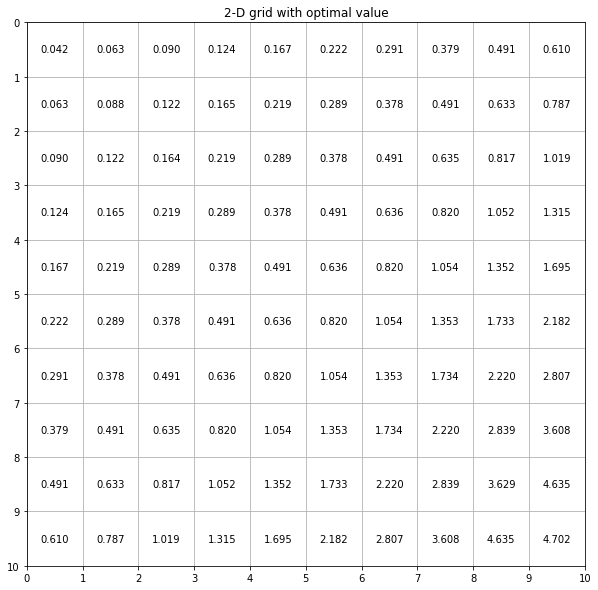

In [10]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca()
ax.invert_yaxis()
ax.set_title("2-D grid with optimal value")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

for j in range(10):
    for i in range(10):
        plt.text(i + 0.5, j + 0.5, "%0.3f" %optimalV[i][j],
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 fontsize = 10)
        
plt.grid()

### Question 3

Generate a heat map of the optimal state values across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier (see the hint after question 1).

Text(0.5, 1.0, 'heat map for optimal value using reward function 1')

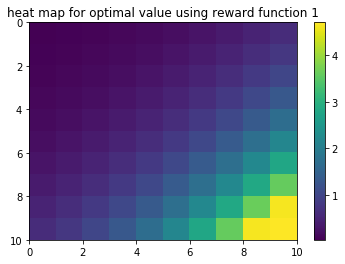

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(optimalV)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for optimal value using reward function 1")

### Question 4

Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in question 3 to explain)

### Question 5

Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. Is it possible for the agent to compute the optimal action to take at each state by observing the optimal values of it’s neighboring states? In this question, you should have 1 plot.

In [91]:
def compute_argmax(row, col, num_actions, w, gamma, V, R):
    maximum = -1000000
    drow = [0, 0, -1, 1]
    dcol = [1, -1, 0, 0]
    action = 0
    for a in range(num_actions):       # iterate over each action, right, left, up, down
        summ = 0
        P = np.zeros((10, 10))
        for i in range(4):   # iterate over each s'
            rowp = row + drow[i]
            colp = col + dcol[i]
            
            if rowp < 0 or rowp > 9: # row out of bound, stay at current position
                rowp = row
            if colp < 0 or colp > 9: # column out of bound, stay at current position
                colp = col
            
            P[rowp][colp] = w / 4.0
            if i == a:
                P[rowp][colp] += 1 - w
              
            summ += P[rowp][colp] * (R[rowp][colp] + gamma * V[rowp][colp])
        
        if summ > maximum:
            maximum = summ
            action = a
    
    return action

In [13]:
num_states = 100
num_actions = 4
w = 0.1
gamma = 0.8
reward_function = reward_function1

pi = np.zeros((10, 10))
for i in range(num_states):
    row = i // 10
    col = i % 10
    pi[row][col] = compute_argmax(row, col, num_actions, w, gamma, optimalV, reward_function)
    
print(pi)   # 0: right, 1: left, 2: up, 3: down

[[3. 0. 0. 0. 0. 0. 0. 3. 3. 3.]
 [3. 3. 0. 0. 0. 0. 3. 3. 3. 3.]
 [3. 3. 3. 0. 0. 3. 3. 3. 3. 3.]
 [3. 3. 3. 0. 3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 0. 0. 3. 3. 3. 3. 3.]
 [3. 3. 0. 0. 0. 0. 3. 3. 3. 3.]
 [3. 0. 0. 0. 0. 0. 0. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


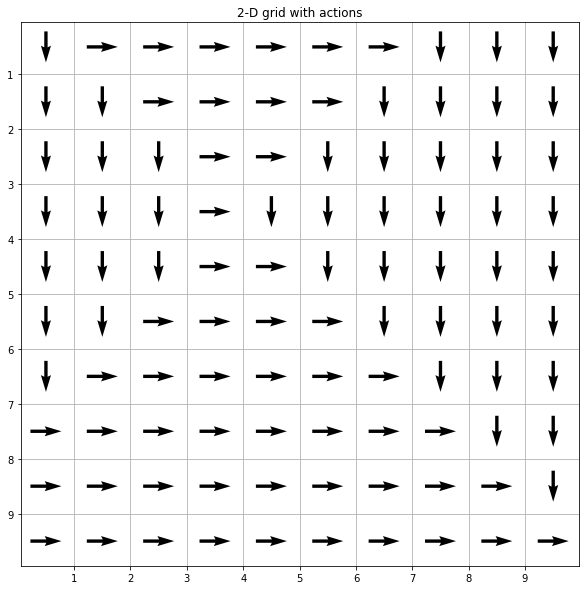

In [14]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca()
ax.invert_yaxis()
ax.set_title("2-D grid with actions")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

X = np.arange(0.5, 10, 1)
Y = np.arange(0.5, 10, 1)
U = np.zeros((10, 10))
V = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        if pi[i][j] == 0:   # right arrow
            U[i][j] = 1
            V[i][j] = 0
        elif pi[i][j] == 1: # left arrow
            U[i][j] = -1
            V[i][j] = 0
        elif pi[i][j] == 2: # up arrow
            U[i][j] = 0
            V[i][j] = 1
        else:               # down arrow
            U[i][j] = 0
            V[i][j] = -1

plt.quiver(X, Y, U, V, pivot = "mid")
plt.grid()

### Question 6

Modify the environment of the agent by replacing Reward function 1 with Reward function 2. Use the optimal state-value function implemented in question 2 to compute the optimal value of each state in the grid. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

In [15]:
num_states = 100
num_actions = 4
w = 0.1
gamma = 0.8
reward_function = reward_function2

optimalV2 = optimal_state_value(num_states, num_actions, w, gamma, reward_function)
print(optimalV2)

[[ 6.48477467e-01  7.94106515e-01  8.25237900e-01  5.36245558e-01
  -2.37043156e+00 -4.23381678e+00 -1.92052971e+00  1.13110795e+00
   1.59435584e+00  2.03820726e+00]
 [ 8.29851948e-01  1.02123596e+00  1.06603296e+00 -1.86790436e+00
  -6.73821942e+00 -8.67375446e+00 -6.36979468e+00 -1.29479626e+00
   1.92834321e+00  2.61046947e+00]
 [ 1.06360962e+00  1.31651254e+00  1.45007729e+00 -1.62402502e+00
  -6.74150886e+00 -1.39111818e+01 -9.64922518e+00 -5.51104325e+00
  -1.31012708e-01  3.35905866e+00]
 [ 1.36025245e+00  1.69269877e+00  1.94802285e+00 -1.23216899e+00
  -6.32308479e+00 -7.97760603e+00 -7.93667980e+00 -9.42386879e+00
  -1.91442835e+00  4.39062525e+00]
 [ 1.73657224e+00  2.17160228e+00  2.58983267e+00 -7.25587435e-01
  -5.83072992e+00 -3.25362550e+00 -3.23020014e+00 -7.41906241e+00
   1.71898209e+00  9.16310147e+00]
 [ 2.21393346e+00  2.78108417e+00  3.41709976e+00 -2.75630965e-02
  -5.09866208e+00 -5.49015498e-01 -4.76652804e-01 -2.96756313e+00
   6.58652246e+00  1.53573288e+01

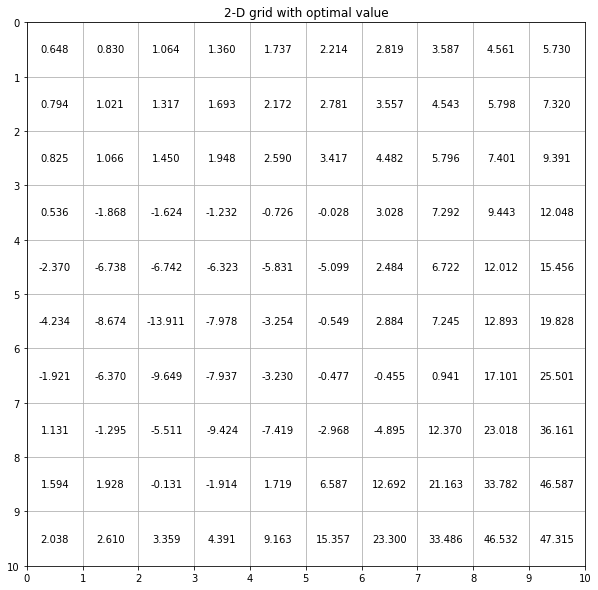

In [16]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca()
ax.invert_yaxis()
ax.set_title("2-D grid with optimal value")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

for j in range(10):
    for i in range(10):
        plt.text(i + 0.5, j + 0.5, "%0.3f" %optimalV2[i][j],
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 fontsize = 10)
        
plt.grid()

### Question 7

Generate a heat map of the optimal state values (found in question 6) across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier.

Text(0.5, 1.0, 'heat map for optimal value using reward function 2')

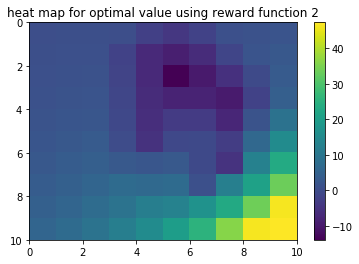

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(optimalV2)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for optimal value using reward function 2")

### Question 8

Explain the distribution of the optimal state values across the 2-D grid.

### Question 9

Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. In this question, you should have 1 plot.

In [18]:
num_states = 100
num_actions = 4
w = 0.1
gamma = 0.8
reward_function = reward_function2

pi = np.zeros((10, 10))
for i in range(num_states):
    row = i // 10
    col = i % 10
    pi[row][col] = compute_argmax(row, col, num_actions, w, gamma, optimalV2, reward_function)
    
print(pi)   # 0: right, 1: left, 2: up, 3: down

[[3. 3. 3. 1. 1. 0. 0. 0. 0. 3.]
 [3. 3. 3. 1. 1. 2. 0. 0. 0. 3.]
 [3. 3. 3. 1. 1. 3. 0. 0. 0. 3.]
 [3. 3. 3. 1. 1. 3. 3. 2. 0. 3.]
 [3. 3. 3. 1. 1. 3. 3. 3. 0. 3.]
 [3. 3. 3. 1. 1. 3. 3. 1. 0. 3.]
 [3. 3. 3. 3. 3. 3. 1. 1. 0. 3.]
 [3. 3. 3. 3. 3. 3. 1. 3. 3. 3.]
 [0. 0. 0. 3. 3. 3. 3. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


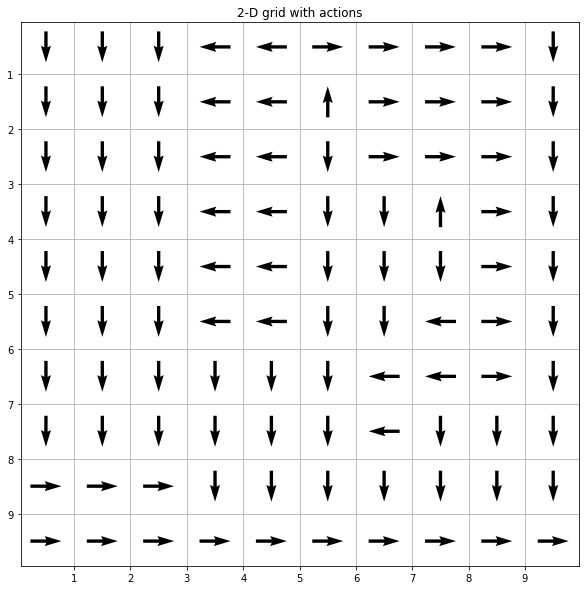

In [19]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca()
ax.invert_yaxis()
ax.set_title("2-D grid with actions")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

X = np.arange(0.5, 10, 1)
Y = np.arange(0.5, 10, 1)
U = np.zeros((10, 10))
V = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        if pi[i][j] == 0:   # right arrow
            U[i][j] = 1
            V[i][j] = 0
        elif pi[i][j] == 1: # left arrow
            U[i][j] = -1
            V[i][j] = 0
        elif pi[i][j] == 2: # up arrow
            U[i][j] = 0
            V[i][j] = 1
        else:               # down arrow
            U[i][j] = 0
            V[i][j] = -1

plt.quiver(X, Y, U, V, pivot = "mid")
plt.grid()

### Question 10

Express c, x, D in terms of R, Pa, Pa1 , ti, u, λ and $R_{max}$

### Question 11

Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute OA(s) by following the process described above. For this problem, use the optimal policy of the agent found in question 5 to fill in the OE(s) values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [20]:
def get_OE(reward_function, epsilon=0.01):    
    num_states = 100
    num_actions = 4
    w = 0.1
    gamma = 0.8
    
    optimalV = optimal_state_value(num_states, num_actions, w, gamma, reward_function, epsilon=epsilon)

    pi = np.zeros((10, 10))
    for i in range(num_states):
        row = i // 10
        col = i % 10
        pi[row][col] = compute_argmax(row, col, num_actions, w, gamma, optimalV, reward_function)

    return pi, optimalV

In [21]:
def get_P(OE, w):
    P = np.zeros((100,100))
    
    drow = [0, 0, -1, 1]
    dcol = [1, -1, 0, 0]
    
    for row in range(10):
        for col in range(10):
            index = 10 * row + col
            opt_a = OE[row][col]
            for a in range(4):
                rowp = row + drow[a]
                colp = col + dcol[a]

                if rowp < 0 or rowp > 9: # row out of bound, stay at current position
                    rowp = row
                if colp < 0 or colp > 9: # column out of bound, stay at current position
                    colp = col
                
                
                trans_prob = w / 4
                if a == opt_a:
                    trans_prob += (1 - w)
                index_p = rowp*10 + colp
                P[index][index_p] += trans_prob
    return P

In [22]:
def get_LP_coe_mtx(gamma, lam, Rmax, OE):
    c = np.vstack([np.zeros((100, 1)), np.ones((100, 1)), -lam*np.ones((100, 1))])
    d = np.vstack([np.zeros([800, 1]), Rmax*np.ones([100, 1]), Rmax*np.ones([100, 1])])
    I = np.eye(100)
    
    P_a1 = get_P(np.mod(OE+0,4), 0.1)
    P_a2 = get_P(np.mod(OE+1,4), 0.1)
    P_a3 = get_P(np.mod(OE+2,4), 0.1)
    P_a4 = get_P(np.mod(OE+3,4), 0.1)
    
    row1 = -np.dot((P_a1-P_a2), np.linalg.inv(np.eye(100)-gamma*P_a1))
    row2 = -np.dot((P_a1-P_a3), np.linalg.inv(np.eye(100)-gamma*P_a1))
    row3 = -np.dot((P_a1-P_a4), np.linalg.inv(np.eye(100)-gamma*P_a1))
    
    D_block = np.vstack([row1, row2, row3])
    
    mtx_a = np.vstack([D_block, D_block, I, -I, I, -I])
    mtx_b = np.vstack([I, I, I, np.zeros([700, 100])])
    mtx_c = np.vstack([np.zeros([600, 100]), -I, -I, np.zeros([200, 100])])
    D = np.hstack([mtx_a, mtx_b, mtx_c])
    
    return c, D, d

In [23]:
from cvxopt import solvers, matrix

def get_reward_func(c, D, d):
    solvers.options['show_progress'] = False
    c = matrix(c)
    D = matrix(D)
    d = matrix(d)
    sol = solvers.lp(-c, D, d)
    sol_R = sol['x'][:100, :]
    R = np.zeros((10, 10))
    for i in range(100):
        row = i // 10
        col = i % 10
        R[row, col] = sol_R[i]
    
    return R

In [24]:
def get_OA(R, num_states, w, gamma, epsilon=0.01):
    optimalV = optimal_state_value(num_states, 4, w, gamma, R, epsilon=epsilon)
    OA = np.zeros((10, 10))
    for i in range(num_states):
        row = i // 10
        col = i % 10
        OA[row][col] = compute_argmax(row, col, num_actions, w, gamma, optimalV, R)
    
    return OA, optimalV

In [25]:
def get_accuracy(OA, OE):
    correct = 0
    for i in range(100):
        row = i // 10
        col = i % 10
        if int(OA[row, col]) == int(OE[row, col]):
            correct += 1
    return correct/100

In [56]:
num_states = 100
w = 0.1
gamma = 0.8
Rmax = 1
OE, _ = get_OE(reward_function1)
x = np.linspace(0, 5.01, 500)
y = []

for lam in x:
    c, D, d = get_LP_coe_mtx(gamma, lam, Rmax, OE)

    # LP
    R = get_reward_func(c, D, d)
    OA, _ = get_OA(R, num_states, w, gamma)
    y.append(get_accuracy(OA, OE))

Text(0, 0.5, 'Accuracy')

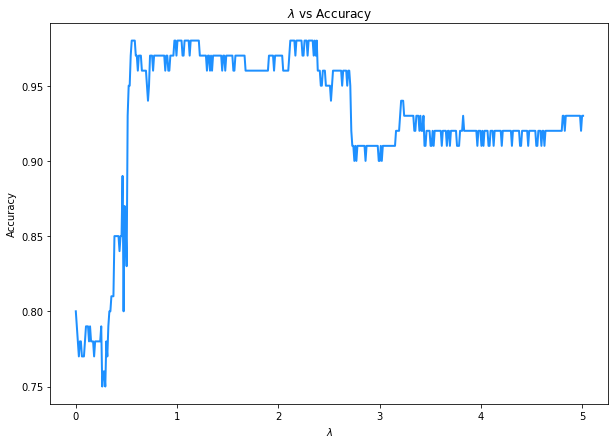

In [57]:
# plot
plt.figure(figsize=(10,7))
plt.plot(x, y, color='dodgerblue', linewidth=2)
plt.title('$\lambda$ vs Accuracy')
plt.xlabel('$\lambda$')
plt.ylabel('Accuracy')

### Question 12

Use the plot in question 11 to compute the value of λ for which accuracy is maximum. For future reference we will denote this value as λmax. Please report λmax.

In [58]:
lam_max = x[np.argmax(y)]
print("The accuracy is max when λ is:", lam_max)

The accuracy is max when λ is: 0.5522044088176352


### Question 13

For λmax, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 1 and the extracted reward is computed by solving the
linear program given by equation 2 with the λ parameter set to λmax. In this question, you should have 2 plots.

In [92]:
num_states = 100
w = 0.1
gamma = 0.8
Rmax = 1
OE, ground_truth_opt_value_1 = get_OE(reward_function1)

c, D, d = get_LP_coe_mtx(gamma, lam_max, Rmax, OE)

# LP
RF_max = get_reward_func(c, D, d)
OA, optimalV_max = get_OA(RF_max, num_states, w, gamma)
acc_max = get_accuracy(OA, OE)

Text(0.5, 1.0, 'heat map for gounrd truth reward function 1')

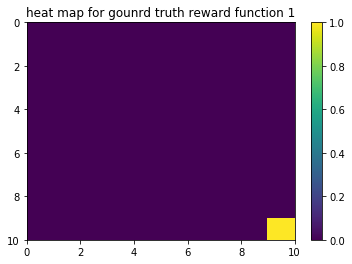

In [60]:
# heat map of reward function 1

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(reward_function1)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for gounrd truth reward function 1")

Text(0.5, 1.0, 'heat map for extracted reward function')

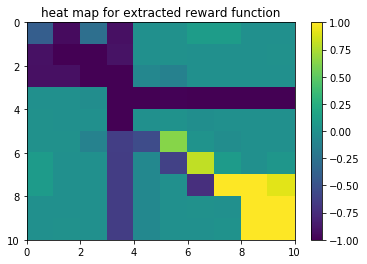

In [61]:
# heat map of extracted reward func

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(RF_max)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for extracted reward function")

### Question 14

Use the extracted reward function computed in question 13, to compute the optimal values of the states in the 2-D grid. For computing the optimal values you need to use the optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat map of the optimal state values across the 2-D grid (similar to the figure generated in question 3). In this question, you should have 1 plot.

Text(0.5, 1.0, 'heat map for optimal values of states')

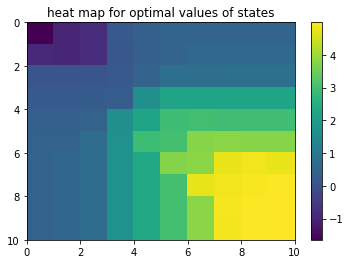

In [62]:
# heat map for optimalV

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(optimalV_max)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for optimal values of states")

### Question 15

Compare the heat maps of Question 3 and Question 14 and provide a brief explanation on their similarities and differences.

### Question 16

Use the extracted reward function found in question 13 to compute the optimal policy of the agent. For computing the optimal policy of the agent you need to use the function that you wrote in question 5. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The actions should be displayed using arrows. In this question, you should have 1 plot.

In [63]:
OA

array([[3., 0., 0., 0., 0., 0., 2., 3., 3., 3.],
       [3., 3., 0., 0., 0., 0., 3., 3., 3., 3.],
       [3., 3., 3., 0., 0., 3., 3., 3., 3., 3.],
       [3., 3., 3., 0., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 0., 0., 3., 3., 3., 3., 3.],
       [3., 3., 0., 0., 0., 0., 3., 3., 3., 3.],
       [1., 0., 0., 0., 0., 0., 0., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [64]:
def draw_arrows(opt_policy):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.gca()
    ax.invert_yaxis()
    ax.set_title("2-D grid with actions")
    ax.set_xticks(np.arange(0, 11, 1))
    ax.set_yticks(np.arange(0, 11, 1))

    X = np.arange(0.5, 10, 1)
    Y = np.arange(0.5, 10, 1)
    U = np.zeros((10, 10))
    V = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            if opt_policy[i][j] == 0:   # right arrow
                U[i][j] = 1
                V[i][j] = 0
            elif opt_policy[i][j] == 1: # left arrow
                U[i][j] = -1
                V[i][j] = 0
            elif opt_policy[i][j] == 2: # up arrow
                U[i][j] = 0
                V[i][j] = 1
            else:                       # down arrow
                U[i][j] = 0
                V[i][j] = -1

    plt.quiver(X, Y, U, V, pivot = "mid")
    plt.grid()

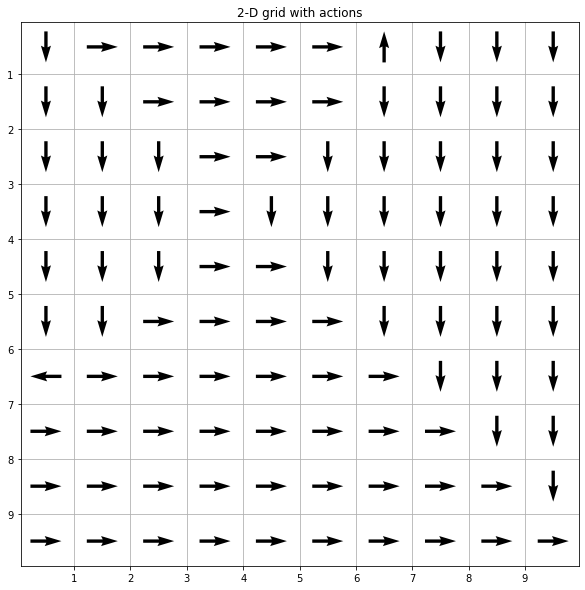

In [65]:
draw_arrows(OA)

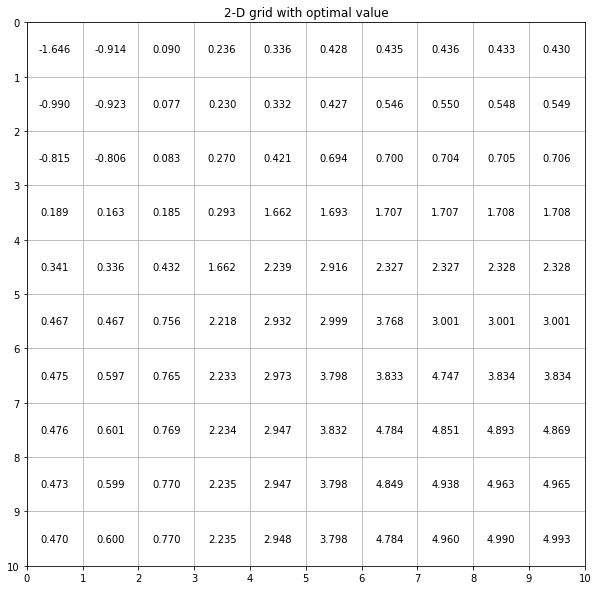

In [66]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca()
ax.invert_yaxis()
ax.set_title("2-D grid with optimal value")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

for j in range(10):
    for i in range(10):
        plt.text(i + 0.5, j + 0.5, "%0.3f" %optimalV_max[i][j],
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 fontsize = 10)
        
plt.grid()

### Question 17

Compare the figures of Question 5 and Question 16 and provide a brief explanation on their similarities and differences.

### Question 18

Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute OA(s) by following the process described above. For this problem, use the optimal policy of the agent found in question 9 to fill in the OE(s) values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [93]:
num_states = 100
w = 0.1
gamma = 0.8
Rmax = 100
OE, _ = get_OE(reward_function2)
x = np.linspace(0, 5.01, 500)
y = []

for lam in x:
    c, D, d = get_LP_coe_mtx(gamma, lam, Rmax, OE)

    # LP
    R = get_reward_func(c, D, d)
    OA, _ = get_OA(R, num_states, w, gamma)
    y.append(get_accuracy(OA, OE))

Text(0, 0.5, 'Accuracy')

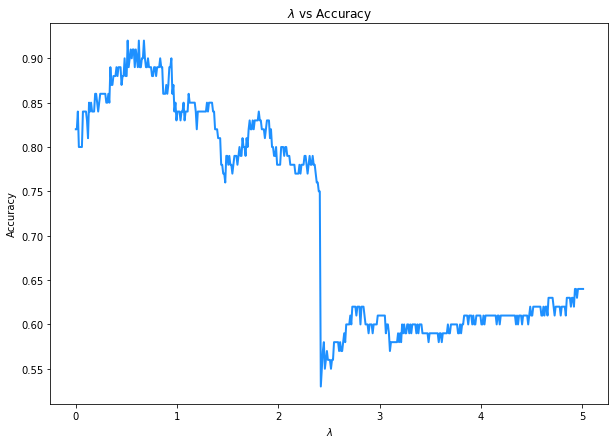

In [94]:
# plot
plt.figure(figsize=(10,7))
plt.plot(x, y, color='dodgerblue', linewidth=2)
plt.title('$\lambda$ vs Accuracy')
plt.xlabel('$\lambda$')
plt.ylabel('Accuracy')

### Question 19

Use the plot in question 18 to compute the value of λ for which accuracy is maximum. For future reference we will denote this value as λmax. Please report λmax

In [95]:
lam_max = x[np.argmax(y)]
print("The accuracy is max when λ is:", lam_max)

The accuracy is max when λ is: 0.5120440881763526


### Question 20

For λmax, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 2 and the extracted reward is computed by solving the
linear program given by equation 2 with the λ parameter set to λmax. In this question, you should have 2 plots.

In [96]:
num_states = 100
w = 0.1
gamma = 0.8
Rmax = 100
OE, ground_truth_opt_value2 = get_OE(reward_function2)

c, D, d = get_LP_coe_mtx(gamma, lam_max, Rmax, OE)

# LP
RF_max = get_reward_func(c, D, d)
OA, optimalV_max = get_OA(RF_max, num_states, w, gamma)
acc_max = get_accuracy(OA, OE)

Text(0.5, 1.0, 'heat map for gounrd truth reward function 2')

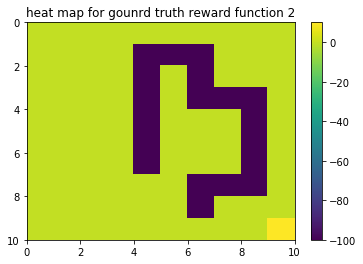

In [97]:
# heat map of reward function 2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(reward_function2)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for gounrd truth reward function 2")

Text(0.5, 1.0, 'heat map for extracted reward function')

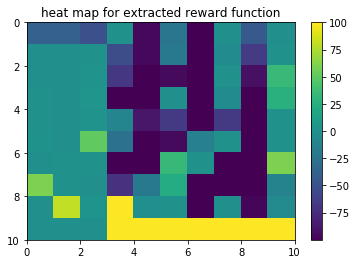

In [98]:
# heat map of extracted reward func

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(RF_max)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for extracted reward function")

### Question 21

Use the extracted reward function computed in question 20, to compute the optimal values of the states in the 2-D grid. For computing the optimal values you need to use the optimal state value function that you wrote in question 2. For visualization purpose, generate a heat map of the optimal state values across the 2-D grid (similar to the figure generated in question 7). In this question, you should have 1 plot.

Text(0.5, 1.0, 'heat map for optimal values of states')

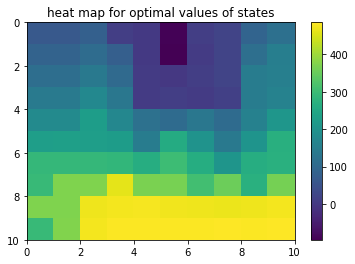

In [99]:
# heat map for optimalV

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(optimalV_max)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for optimal values of states")

### Question 22

Compare the heat maps of Question 7 and Question 21 and provide a brief explanation on their similarities and differences.

### Question 23

Use the extracted reward function found in question 20 to compute the optimal policy of the agent. For computing the optimal policy of the agent you need to use the function that you wrote in question 9. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The actions should be displayed using arrows. In this question, you should have 1 plot.

In [100]:
OA

array([[3., 3., 3., 1., 1., 0., 0., 0., 0., 3.],
       [3., 3., 3., 1., 1., 1., 0., 0., 0., 3.],
       [3., 3., 3., 1., 1., 3., 0., 0., 0., 3.],
       [3., 0., 3., 1., 1., 3., 3., 3., 0., 3.],
       [3., 0., 3., 1., 1., 3., 3., 3., 0., 3.],
       [3., 3., 3., 1., 1., 3., 3., 1., 0., 3.],
       [3., 3., 3., 3., 3., 3., 1., 1., 0., 0.],
       [3., 3., 3., 3., 3., 3., 1., 3., 3., 3.],
       [0., 0., 0., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 3., 1., 0., 3., 0., 0.]])

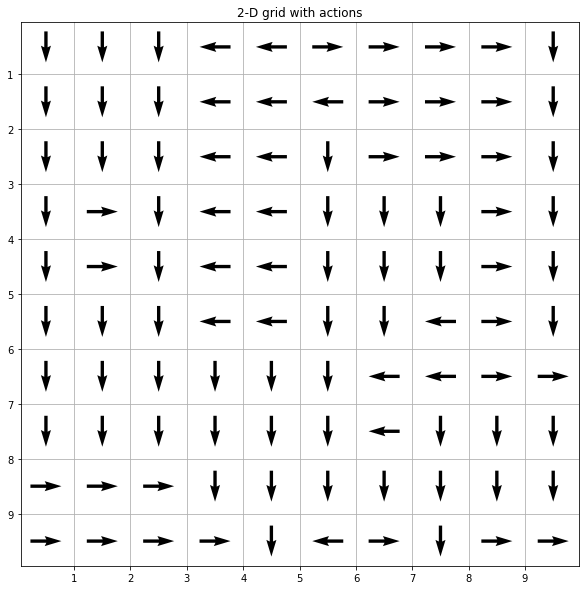

In [101]:
draw_arrows(OA)

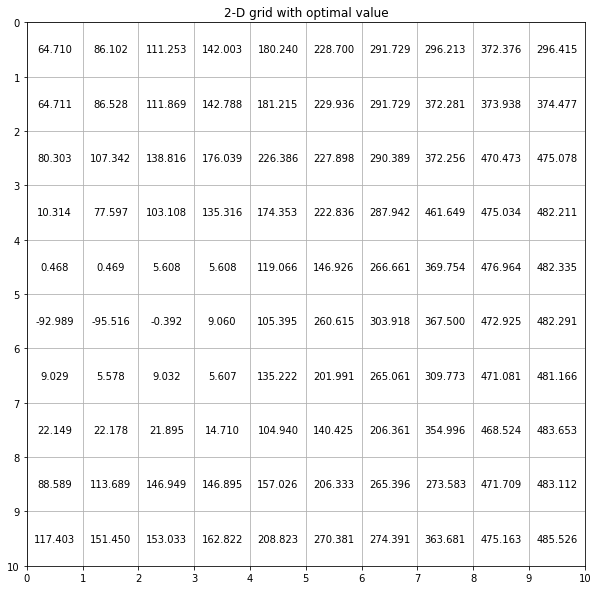

In [104]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca()
ax.invert_yaxis()
ax.set_title("2-D grid with optimal value")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

for j in range(10):
    for i in range(10):
        plt.text(i + 0.5, j + 0.5, "%0.3f" %optimalV_max[i][j],
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 fontsize = 10)
        
plt.grid()

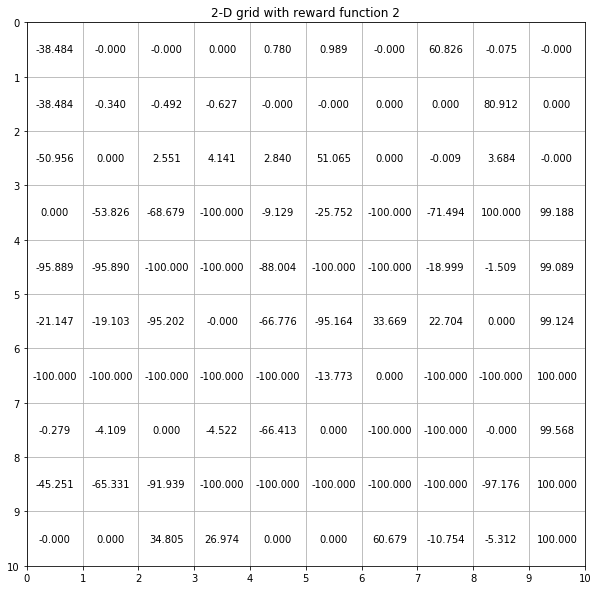

In [105]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca()
ax.invert_yaxis()
ax.set_title("2-D grid with reward function 2")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

for j in range(10):
    for i in range(10):
        plt.text(i + 0.5, j + 0.5, "%0.3f" %RF_max[i][j],
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 fontsize = 10)
        
plt.grid()

### Question 24

Compare the figures of Question 9 and Question 23 and provide a brief explanation on their similarities and differences.

### Question 25

From the figure in question 23, you should observe that the optimal policy of the agent has two major discrepancies. Please identify and provide the causes for these two discrepancies. One of the discrepancy can be fixed easily by a slight modification to the value iteration algorithm. Perform this modification and rerun the modified value iteration algorithm to compute the optimal policy of the agent. Also, recompute the maximum accuracy after this modification. Is there a change in maximum accuracy? The second discrepancy is harder to fix and is a limitation of the simple IRL algorithm. If you can provide a solution to the second discrepancy then we will give you a bonus of 50 points.

In [102]:
num_states = 100
w = 0.1
gamma = 0.8
Rmax = 100
OE_revised, ground_truth_opt_value_revised = get_OE(reward_function2, epsilon=1e-8)

c, D, d = get_LP_coe_mtx(gamma, lam_max, Rmax, OE_revised)

# LP
RF_max_revised = get_reward_func(c, D, d)
OA_revised, opt_value_revised = get_OA(RF_max_revised, num_states, w, gamma, epsilon=1e-8)
acc_max = get_accuracy(OA_revised, OE_revised)
print(acc_max)

1.0


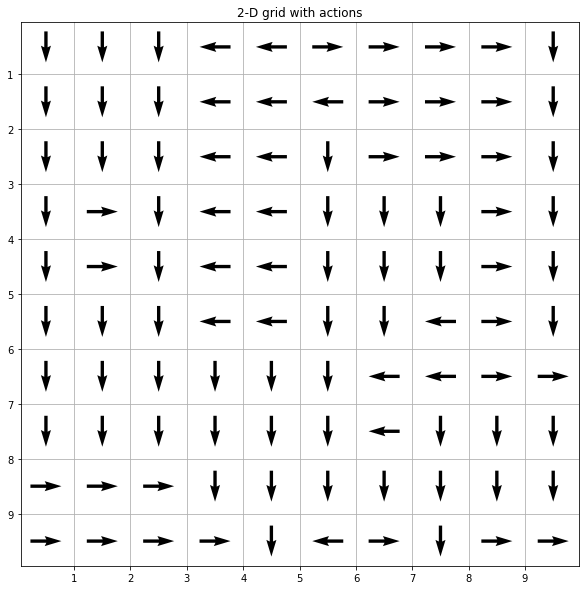

In [103]:
draw_arrows(OA)

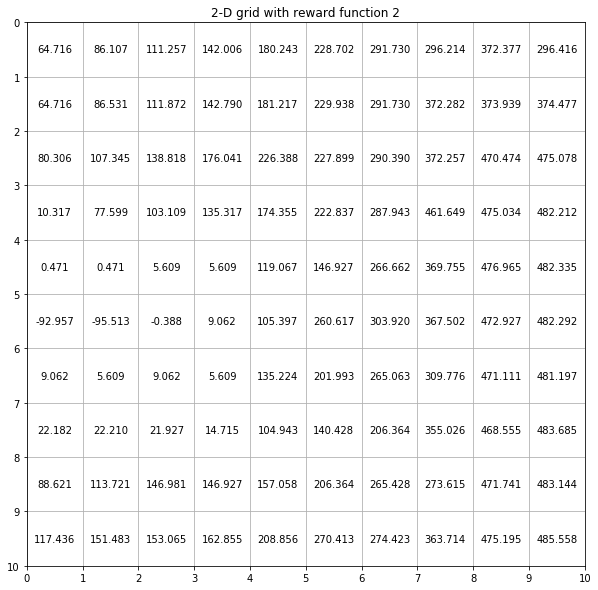

In [106]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca()
ax.invert_yaxis()
ax.set_title("2-D grid with reward function 2")
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))

for j in range(10):
    for i in range(10):
        plt.text(i + 0.5, j + 0.5, "%0.3f" %opt_value_revised[i][j],
                 horizontalalignment = 'center',
                 verticalalignment = 'center',
                 fontsize = 10)
        
plt.grid()